# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
from sklearn.model_selection import train_test_split

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows - 1 points

In [3]:
df = pd.read_csv("car-mpg-1.csv", na_values=['?'])  

In [4]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis - 2 points

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [6]:
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary. - 1 points

In [7]:
df.isna().any()

mpg         False
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
origin      False
car name    False
dtype: bool

### The hp column seems to have some improper data

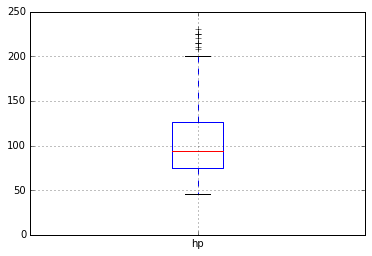

In [8]:
df.boxplot(column='hp')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20b92860>]],
      dtype=object)

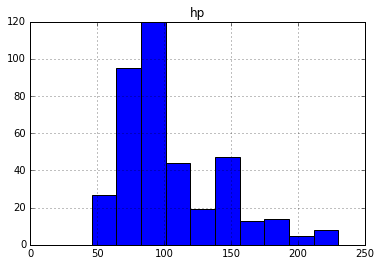

In [9]:
df.hist(column='hp')

In [10]:
df['hp'].median()

93.5

In [11]:
df['hp'].fillna(df['hp'].median(), inplace = True)

In [12]:
df.isna().any()

mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
car name    False
dtype: bool

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences - 1 points

In [13]:
df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


### Observation
- hp (horsepower) is highly correlated with the disp (displacement) of the car
- wt (weight) is inversely correlated with the mpg (miles per gallon)

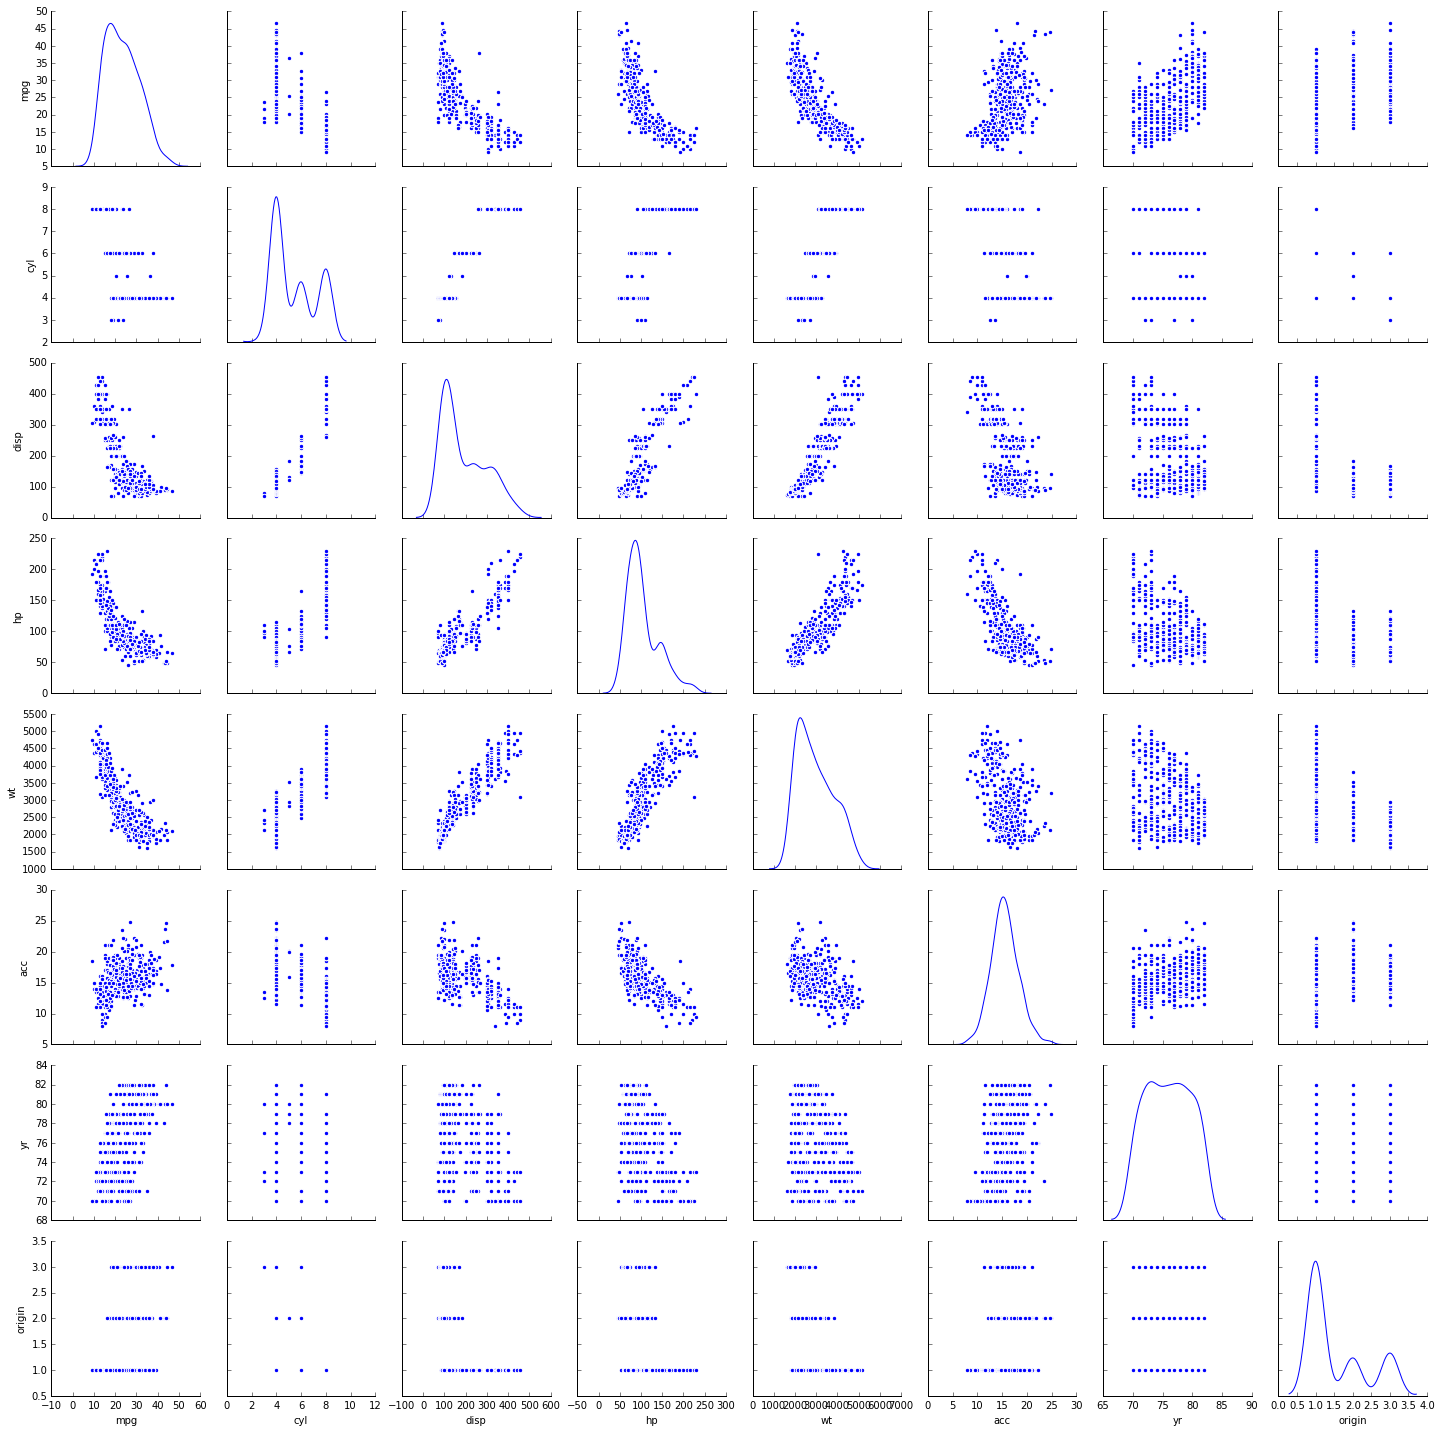

In [14]:
sns.pairplot(df, diag_kind='kde') 

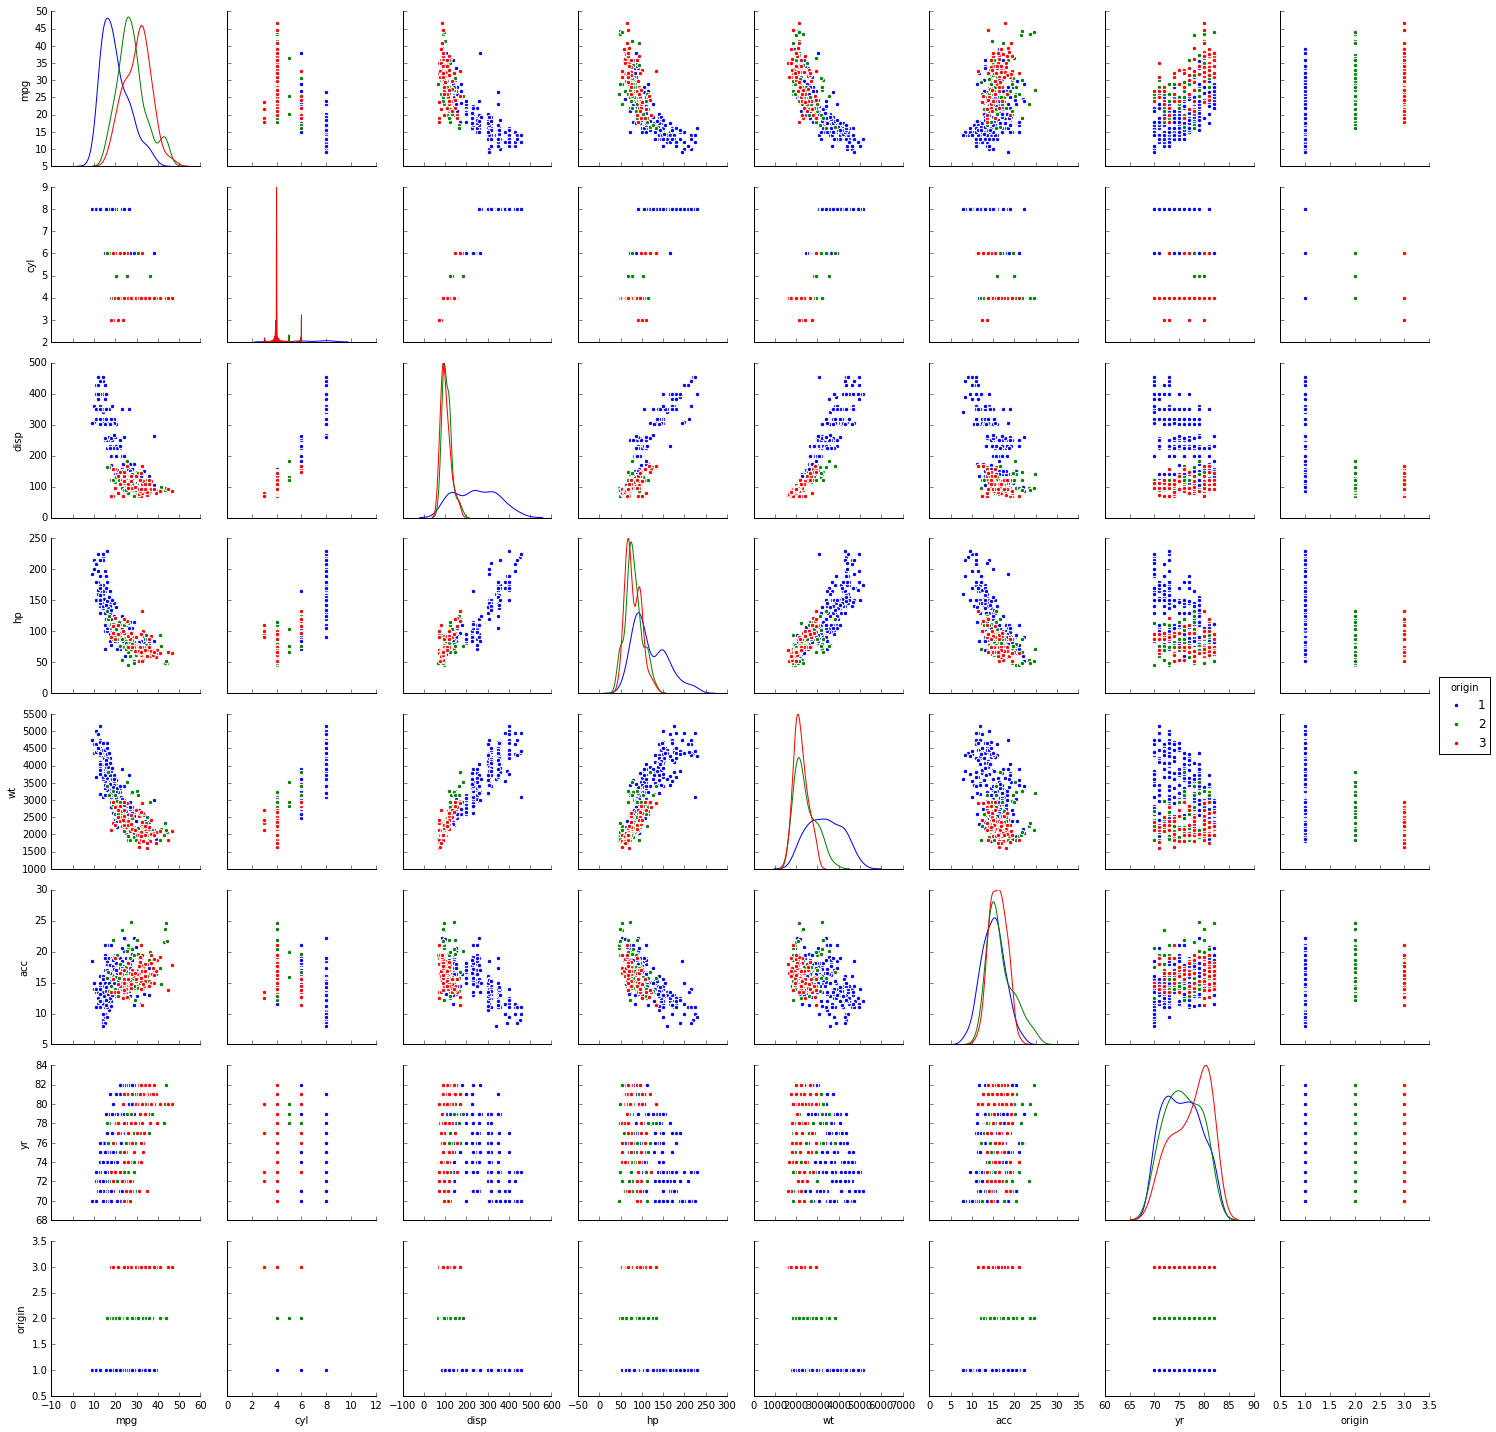

In [15]:
sns.pairplot(df, diag_kind='kde',hue='origin') 

### Doing a pairplot with class as 'origin', clearly shows that 
- more cars (median) from origin 3 (Asia) is much higher than that of origin 2 (Europe) followed by origin 1 (North America)
- Origin 1 cars (American cars) are generally heavier
- Many Origin 3 (Asia) cars have launched much recently as compared to the other two
- Origin 2 and Origin 3 cars have same distribution for disp but Origin 1 cars have very high disp. The same trend is reflected in their hp

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns - 1.5 points

In [16]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car name'], dtype='object')

In [17]:
df1 = df

### the 'yr' column can give 'age' of the cars since launch

In [18]:
def getModelAge(year):
    return 118 - year

In [19]:
df1['age'] = df['yr'].apply(getModelAge)

In [20]:
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name,age
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,48
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,48
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,48
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,48
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,48


In [21]:
df1.corr()['age']

mpg      -0.579267
cyl       0.348746
disp      0.370164
hp        0.413733
wt        0.306564
acc      -0.288137
yr       -1.000000
origin   -0.180662
age       1.000000
Name: age, dtype: float64

### The age of the car is negetively correlated with the mpg. Meaning, older the cars, lesser the efficiency of the car

### the 'yr' column and the 'age' is equivalent. So it is safe to drop 1

In [22]:
df1.drop('yr', axis=1, inplace=True)

### the 'car name' column can give 'automaker'

In [23]:
def getFirstName(string):
    return string.split(' ')[0]

In [24]:
df1['automaker'] = df1['car name'].apply(getFirstName)

In [25]:
df1['automaker'].describe()

count      398
unique      37
top       ford
freq        51
Name: automaker, dtype: object

In [26]:
df1['automaker'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

### Clearly there are same auto makers with spelling mistakes like
- toyota/toyouta
- volkswagen/vw/vokswagen
- chevrolet/chevy/chevroelt
- mercedes-benz/mercedes

In [27]:
df1.replace(['toyouta','vokswagen','vw','chevroelt','chevy','mercedes'],\
           ['toyota','volkswagen','volkswagen','chevrolet','chevrolet','mercedes-benz'], inplace=True)

In [28]:
df1['automaker'].describe()

count      398
unique      31
top       ford
freq        51
Name: automaker, dtype: object

In [29]:
df['automaker'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile',
       'chrysler', 'mazda', 'volvo', 'renault', 'maxda', 'honda',
       'subaru', 'capri', 'mercedes-benz', 'cadillac', 'triumph',
       'nissan'], dtype=object)

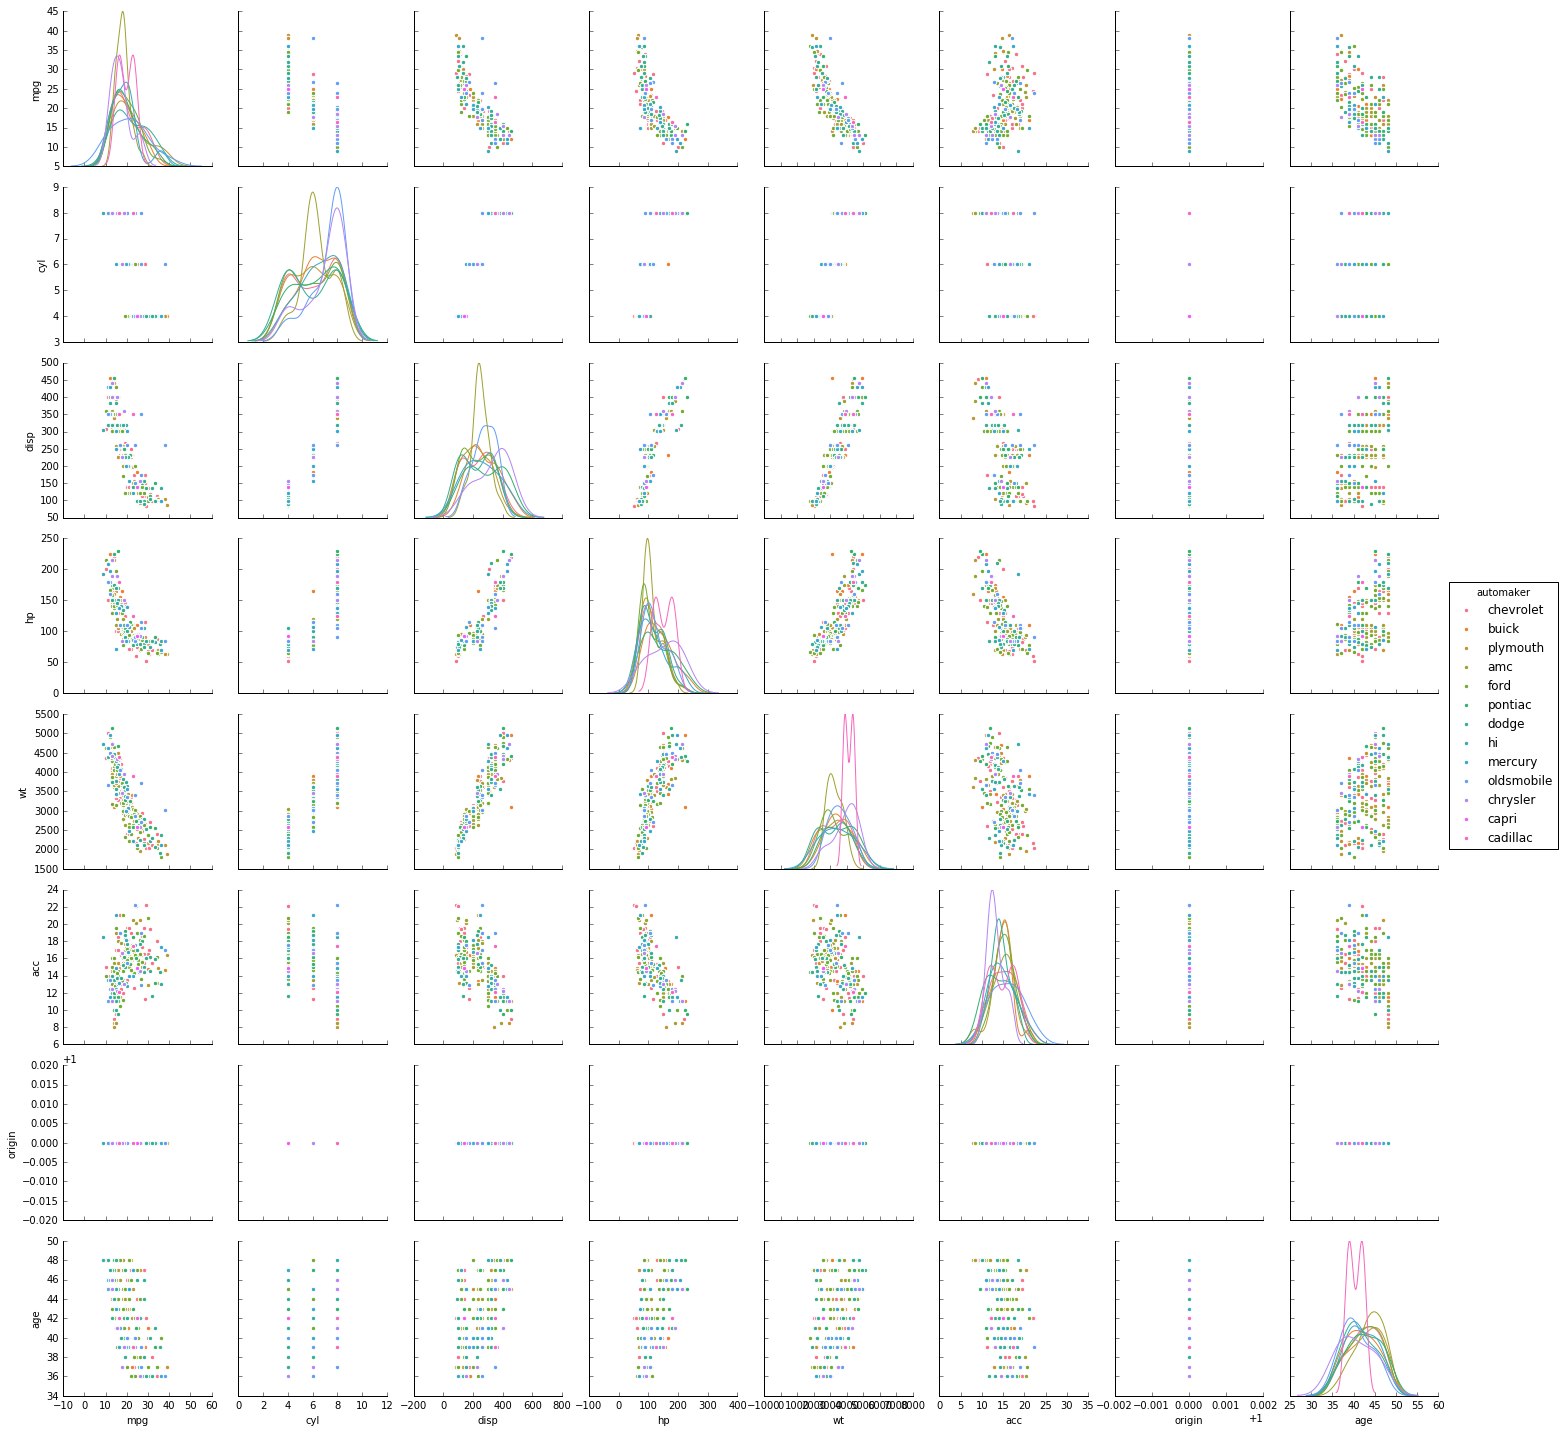

In [30]:
sns.pairplot(df1[df1['origin'] == 1], diag_kind='kde',hue='automaker') 

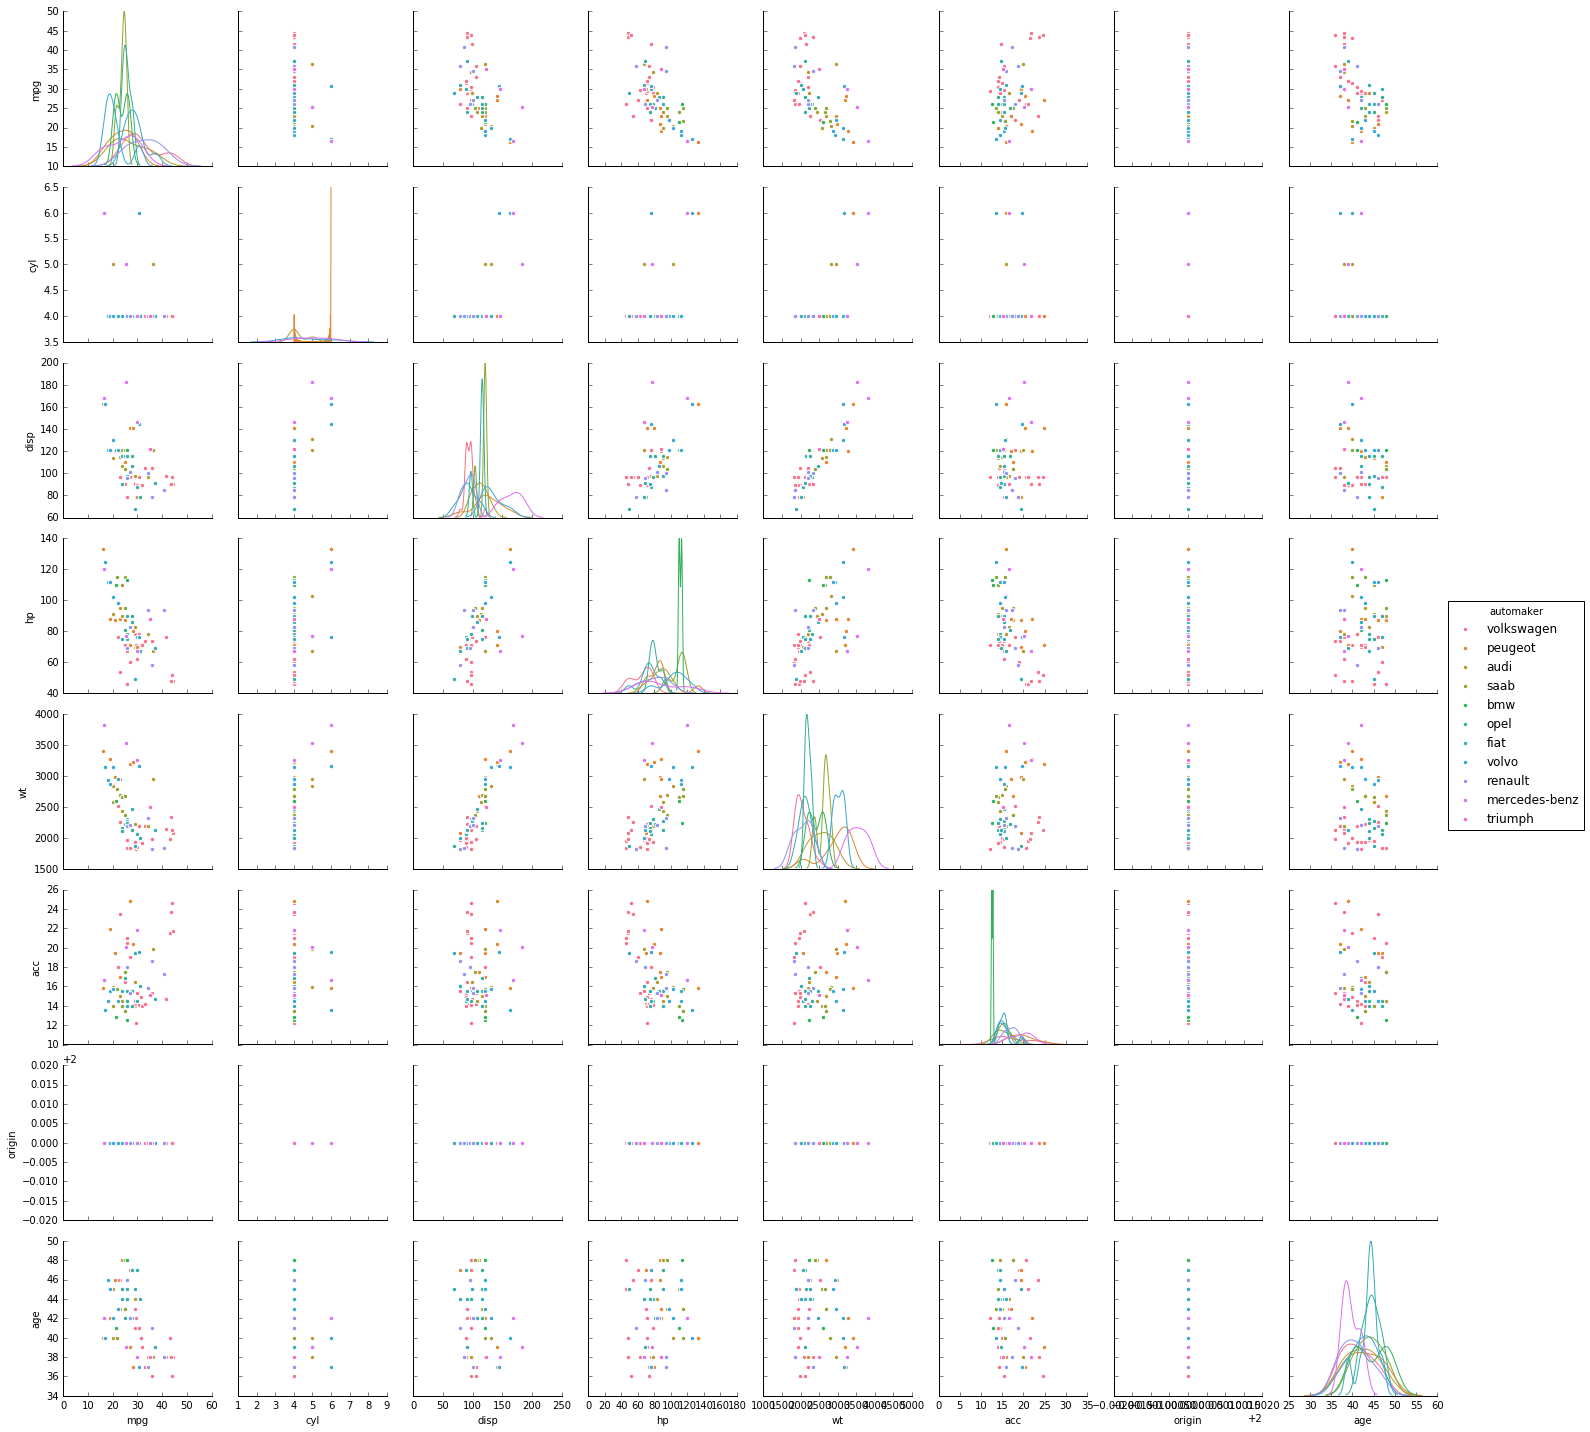

In [31]:
sns.pairplot(df1[df1['origin'] == 2], diag_kind='kde',hue='automaker') 

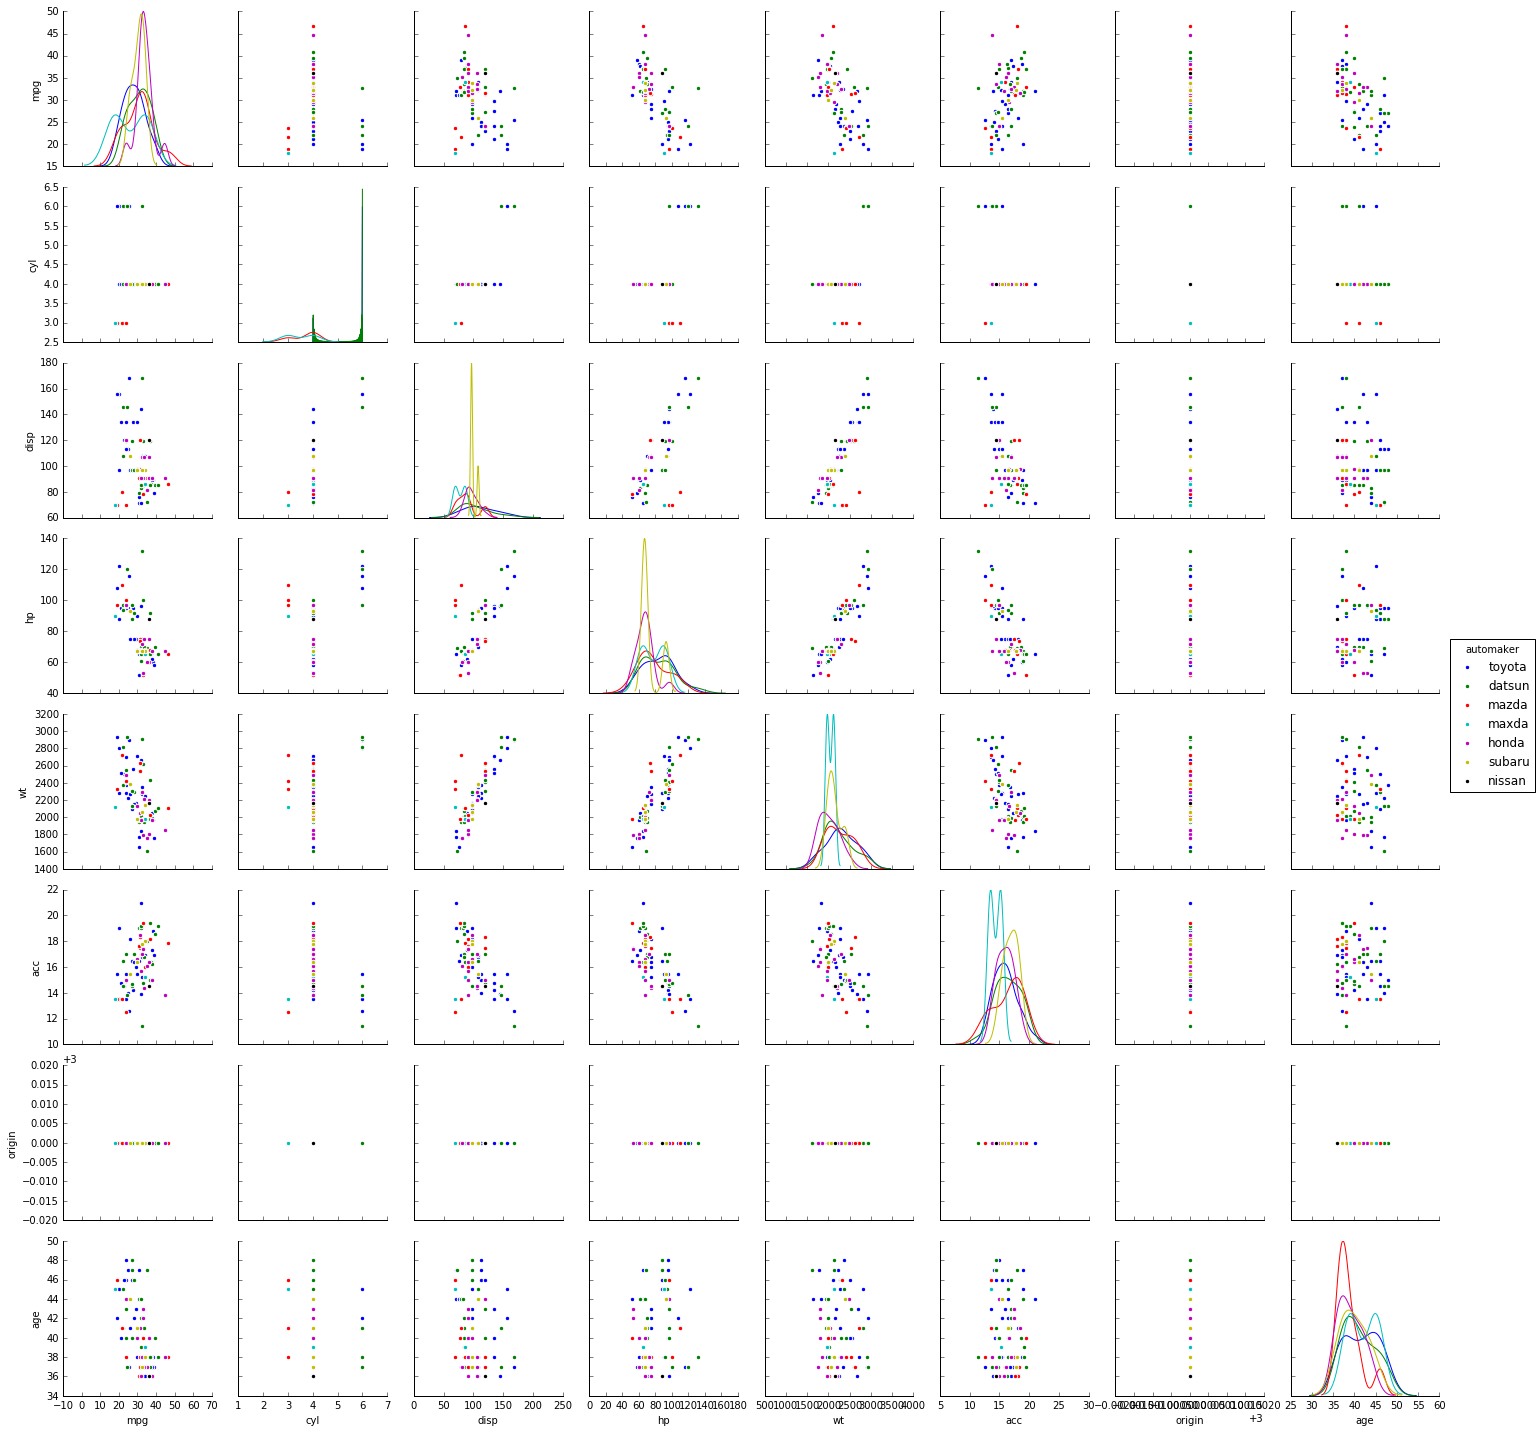

In [32]:
sns.pairplot(df1[df1['origin'] == 3], diag_kind='kde',hue='automaker') 

### the 'automaker' column does not give any value for insights based on above plots, so it is safe to drop and our feature engg for automaker was useless

In [33]:
df1.drop('automaker', axis=1, inplace=True)

### the 'car name' column does not give any value for insights. So it is safe to drop

In [34]:
df1.drop('car name', axis=1, inplace=True)

### Since origin is categorical value, converting it to one hot encoding 

In [54]:
df1 = pd.get_dummies(df1, columns=['origin'])
df1.head()

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,48,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,48,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,48,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,48,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,48,1,0,0


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers - 2 points

In [67]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'origin', 'age'], dtype='object')

In [66]:
df1.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'age', 'origin_1', 'origin_2',
       'origin_3'],
      dtype='object')

In [74]:
p75 = df.quantile(0.75)
p25 = df.quantile(0.25)
df_iqr = p75 - p25
mini = p25 - 1.5*df_iqr
maxi = p75 + 1.5*df_iqr

In [75]:
k = ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'age']

In [76]:
df2 = df[k]
df2 = df2[(df2 > mini) & (df2 < maxi)].dropna()
df2.shape

(378, 7)

In [77]:
df2.index

Int64Index([  0,   1,   2,   3,   4,   5,  10,  12,  14,  15,
            ...
            387, 388, 389, 390, 391, 392, 393, 395, 396, 397],
           dtype='int64', length=378)

In [78]:
df2 = df2.join(df1[['origin_1', 'origin_2','origin_3']],how='left')

In [79]:
from scipy.stats import zscore
df2 = df2.apply(zscore)
df2.sample(5)

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
252,-0.597101,0.371013,0.443389,0.107978,0.730681,1.470591,-0.512420,0.784465,-0.459933,-0.509902
310,1.917968,-0.832789,-1.004832,-1.255579,-1.175253,1.307024,-1.065043,-1.274755,-0.459933,1.961161
1,-1.156005,1.574815,1.657039,1.926055,0.922856,-1.678079,1.698075,0.784465,-0.459933,-0.509902
31,0.174719,-0.832789,-0.760063,-0.195034,-0.859016,-0.655784,1.421763,-1.274755,-0.459933,1.961161
170,-0.091426,-0.832789,-0.484697,-0.710156,-0.416285,1.184348,0.316516,0.784465,-0.459933,-0.509902


# Q7. Create appropriate clusters with the new data set - 2

In [80]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
cluster_range=range(2,10)
cluster_errors=[]
cluster_sil_scores = []


for k in cluster_range:
    clusters=KMeans(n_clusters=k , random_state=1)
    clusters.fit(df2)
    prediction=clusters.predict(df2)
    #meanDistortions.append(sum(np.min(cdist(df2, model.cluster_centers_, 'euclidean'), axis=1)) / df2.shape[0])
    cluster_errors.append( clusters.inertia_ )
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_sil_scores.append(metrics.silhouette_score(df2, labels, metric='euclidean'))

In [81]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors , "Avg Sil Score": cluster_sil_scores } )

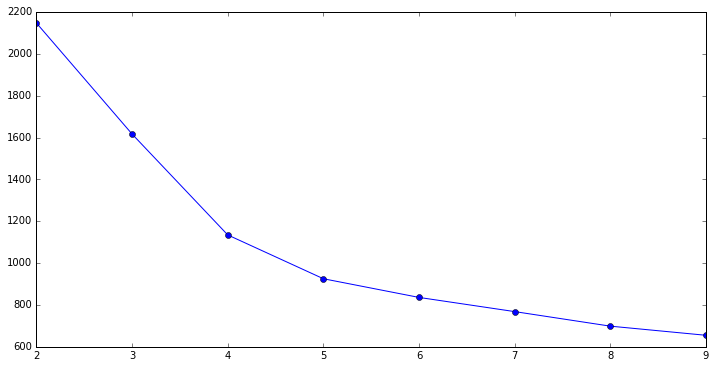

In [82]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Fitting the KMeans with no of clusters as 4

In [83]:
clusters=KMeans(n_clusters=4 , random_state=1)
clusters.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [84]:
df2['cluster'] = clusters.labels_

In [85]:
df2.sample(10)

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3,cluster
148,0.307792,-0.832789,-0.729466,-0.801060,-0.837123,-0.655784,0.592828,-1.274755,2.174229,-0.509902,3
228,-0.690251,0.371013,0.637165,-0.104131,0.718518,1.388807,-0.236108,0.784465,-0.459933,-0.509902,0
167,0.707009,-0.832789,-0.923243,-0.801060,-0.928345,0.162053,0.316516,-1.274755,-0.459933,1.961161,1
53,0.973154,-0.832789,-1.188410,-1.104073,-1.412430,1.388807,1.421763,-1.274755,-0.459933,1.961161,1
355,1.332449,-0.832789,-0.821255,-0.801060,-0.880910,-0.492216,-1.341355,-1.274755,-0.459933,1.961161,1
205,0.573936,-0.832789,-0.923243,-0.801060,-0.947806,0.325620,0.040204,-1.274755,-0.459933,1.961161,1
72,-1.156005,1.574815,1.187897,1.471536,1.164898,-1.269161,1.145452,0.784465,-0.459933,-0.509902,2
97,-0.756788,0.371013,0.382197,0.107978,0.227135,0.366512,0.869140,0.784465,-0.459933,-0.509902,0
51,0.840081,-0.832789,-1.106820,-0.952567,-1.046326,1.593267,1.421763,-1.274755,2.174229,-0.509902,3
213,-1.422150,1.574815,1.657039,1.320030,1.363154,-1.473620,0.040204,0.784465,-0.459933,-0.509902,2



# Q8. Identify the appropriate clusters with result from above question - 1.5 points

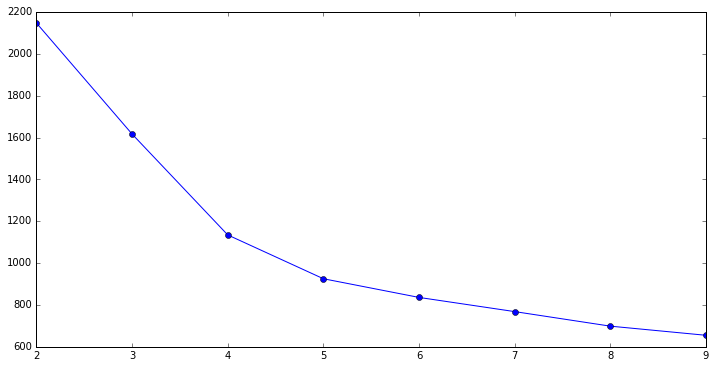

In [105]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### The appropriate number of clusters as per above graph is 4

# Q9. Check for no of values in each cluster and centers for each variables - 1 point

In [103]:
# No of values in each cluster
df2.cluster.value_counts()

0    147
2     87
1     78
3     66
Name: cluster, dtype: int64

In [104]:
# Centers for each variables
pd.DataFrame(clusters.cluster_centers_, columns=df1.columns)

,mpg,cyl,disp,hp,wt,acc,age,origin_1,origin_2,origin_3
0,-0.005064,-0.185848,-0.091490,-0.323042,-0.102274,0.370406,-0.194755,0.784465,-0.459933,-0.509902
1,0.872496,-0.771055,-0.862835,-0.648777,-0.865519,0.223391,-0.349466,-1.274755,-0.459933,1.961161
2,-1.158299,1.560978,1.533248,1.564530,1.423270,-1.054831,0.542012,0.784465,-0.459933,-0.509902
3,0.506997,-0.732472,-0.797613,-0.576096,-0.625451,0.301457,0.132308,-1.274755,2.174229,-0.509902


# Q10. Assign the groups created above to data frame and study the characteristics  for each group. - 2 points

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a31a13898>,
      dtype=object)

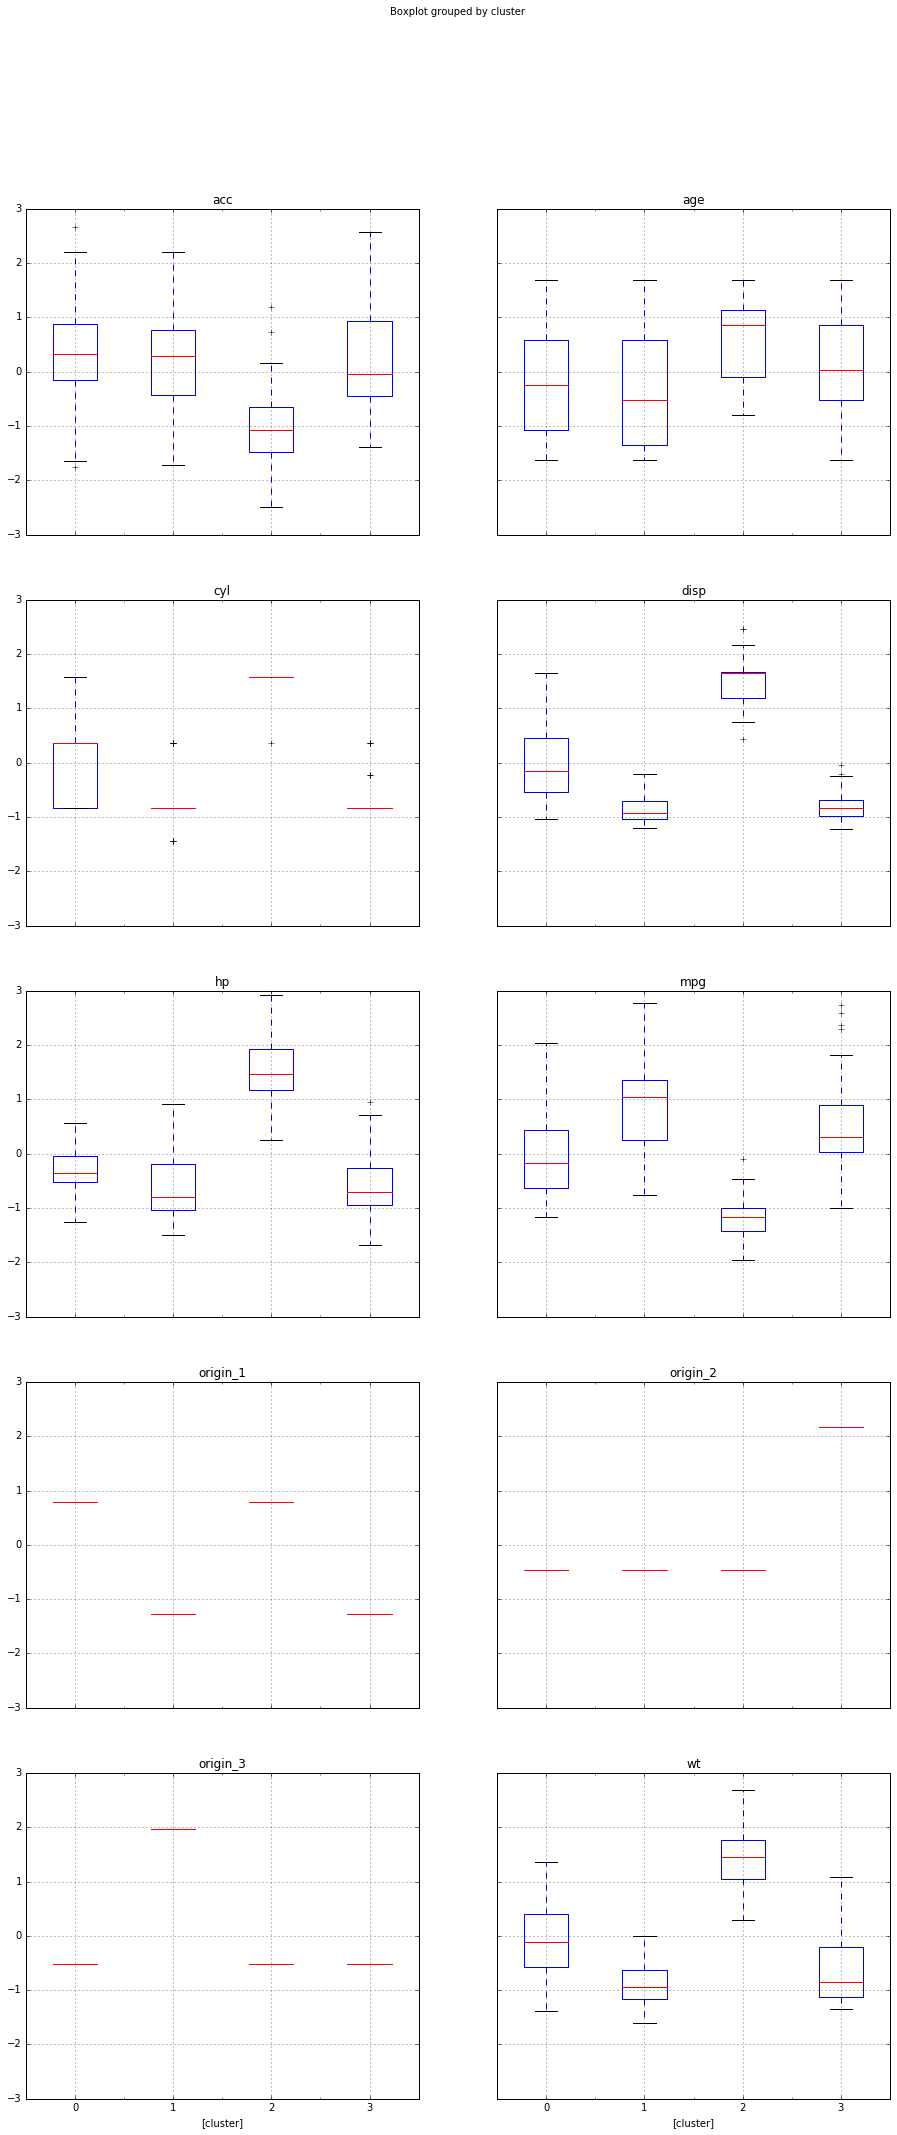

In [86]:
df2.boxplot(by = 'cluster',  layout=(5,2), figsize=(15, 35))

### Observations
- Cluster 2 is high efficiency cars
- Cluster 3 is least efficient cars
- Cluster 4 cars are mostly European cars
- Cluster 1 and 3 are origin 1 cars
- Cluster 3 are highest hp cars
- Cluster 1 is more efficient among the origin 1 cars
